## Total Signal is generated by sinusoinal signal + random signal + linear trend

(0.0, 200.0, -4.0, 4.0)

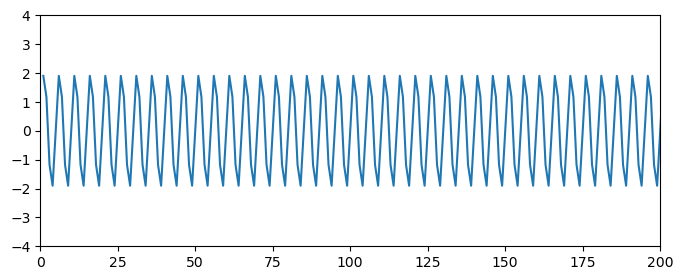

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(1,1000,1000)
x = 2*np.sin(2*np.pi*t/5)
plt.figure(figsize=(8,3))
plt.plot(t,x)
plt.axis(np.array([0,200,-4,4]))

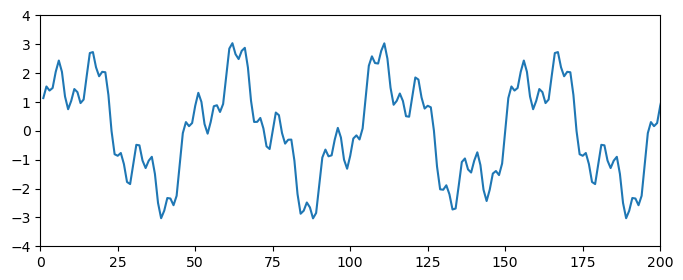

In [2]:
# we compute such a signal by adding three sine waves with periods 
# τ1 = 50 (f1 = 0.02), τ2 = 15 (f2 = 0.07), and τ3 = 5 (f3 = 0.2). 
# The corresponding amplitudes are A1 = 2, A2 = 1, and A3 = 0.5
t = np.linspace(1,1000,1000)
x = 2*np.sin(2*np.pi*t/50) + \
np.sin(2*np.pi*t/15) + \
0.5*np.sin(2*np.pi*t/5)
plt.figure(figsize=(8,3))
plt.plot(t,x)
plt.axis(np.array([0,200,-4,4]))
plt.show()

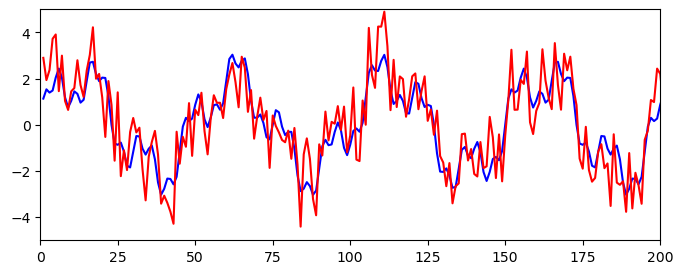

In [3]:
np.random.seed(0)
ns = np.random.randn(1000)

xns = x + ns
plt.figure(figsize=(8,3))
plt.plot(t,x,'b-',t,xns,'r-')
plt.axis(np.array([0,200,-5,5]))
plt.show()

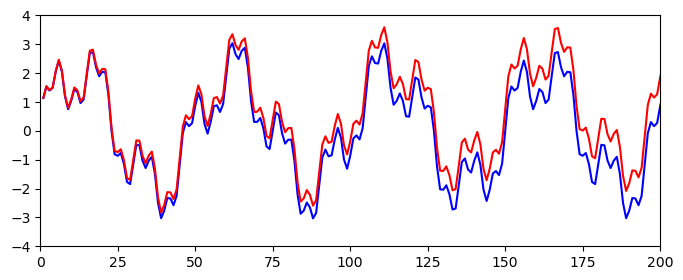

In [4]:
xt = x + 0.005 * t
plt.figure(figsize=(8,3))
plt.plot(t,x,'b-',t,xt,'r-')
plt.axis(np.array([0,200,-4,4]))
plt.show()

In [5]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(1,1000,1000)
t = np.transpose(t)
x = 2*np.sin(2*np.pi*t/50) + \
np.sin(2*np.pi*t/15) + \
0.5*np.sin(2*np.pi*t/5)

np.random.seed(0)
ns = np.random.randn(1000)
xns = x + ns
xt = x + 0.005*t

In [6]:
Xxx = np.fft.rfft(x,1024)

In [7]:
Pxx2 = np.abs(Xxx)**2/1000

In [8]:
Pxx = np.hstack((Pxx2[0],2*Pxx2[1:512]))

In [9]:
f = np.arange(0,1/2,1/1024)

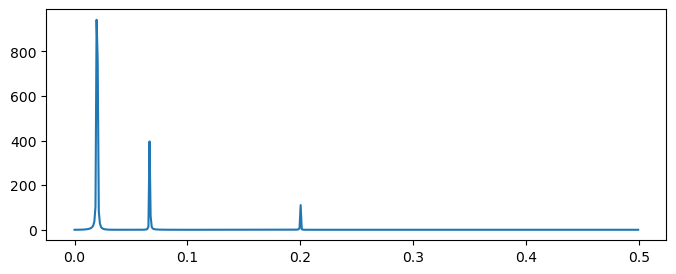

In [14]:
plt.figure(figsize=(8,3))
plt.plot(f,Pxx)
plt.grid
plt.show()

/tmp/ipykernel_367/85053438.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1.0/f,Pxx)


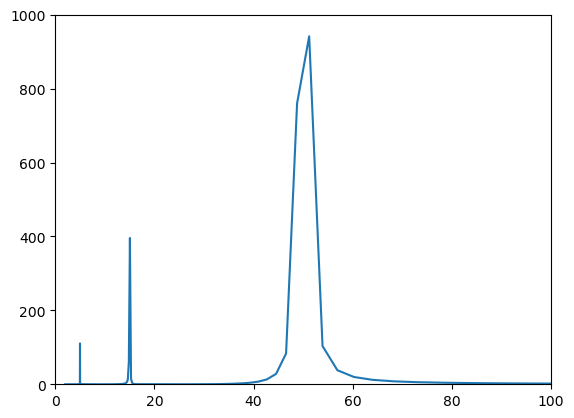

In [22]:
plt.figure()
plt.plot(1.0/f,Pxx)
plt.axis(np.array([0,100,0,1000]))
plt.grid
plt.show()

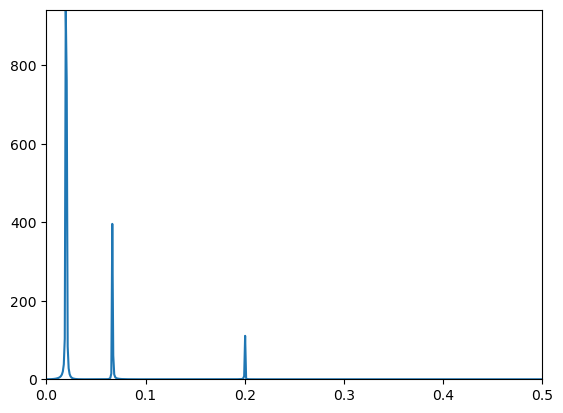

In [23]:
Fs = 1
t = np.arange(1/Fs,1000/Fs+1/Fs,1/Fs)
t = np.transpose(t)
x = 2*np.sin(2*np.pi*t/50) + \
np.sin(2*np.pi*t/15) + \
0.5*np.sin(2*np.pi*t/5)
nfft = 2**np.ceil(np.log2(t.size))
Xxx = np.fft.rfft(x,int(nfft))
Pxx2 = np.abs(Xxx)**2/Fs/len(x)
Pxx = np.hstack((Pxx2[0],2*Pxx2[1:512]))
f = np.arange(0,Fs/2,Fs/(nfft-1))
plt.figure()
plt.plot(f,Pxx)
plt.grid
plt.axis(np.array([0,0.5,0,np.amax(Pxx)]))
plt.show()

In [16]:
f,Pxx = signal.periodogram(x,fs=1,nfft=1024)

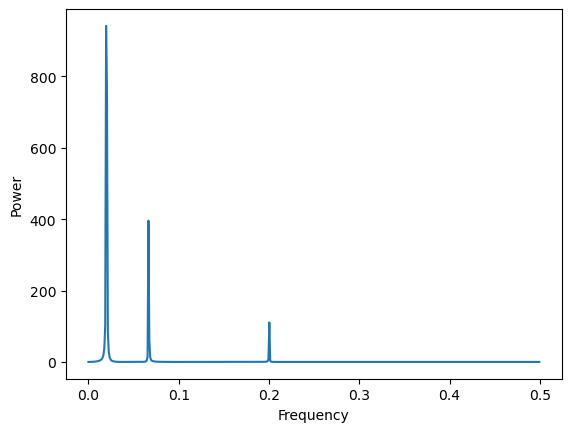

In [24]:
plt.figure()
plt.plot(f,Pxx)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

/tmp/ipykernel_106/1895719080.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1.0/f,Pxx)


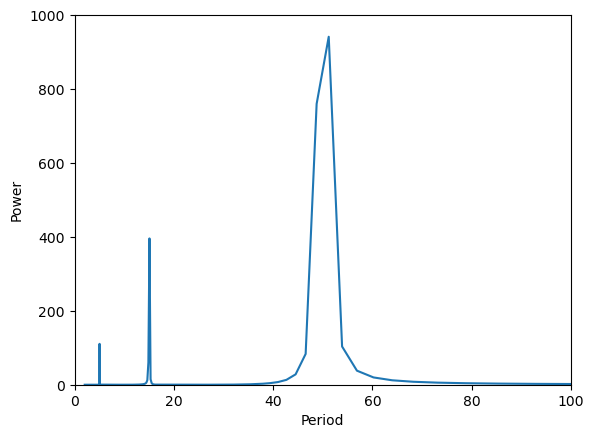

In [21]:
plt.figure()
plt.plot(1.0/f,Pxx)
plt.axis(np.array([0,100,0,1000]))
plt.grid
plt.xlabel('Period')
plt.ylabel('Power')
plt.show()

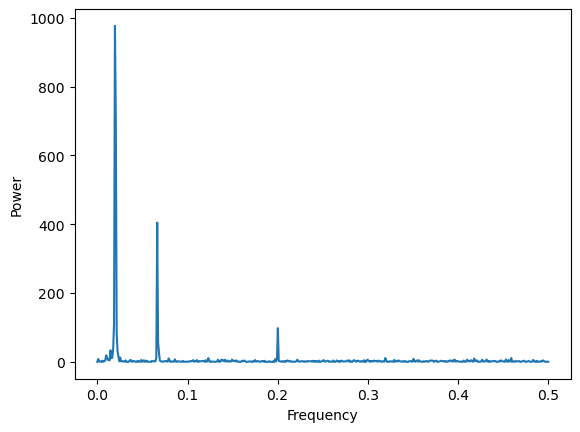

In [25]:
f,Pxx = signal.periodogram(xns,fs=1,nfft=1024)
plt.figure()
plt.plot(f,Pxx)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

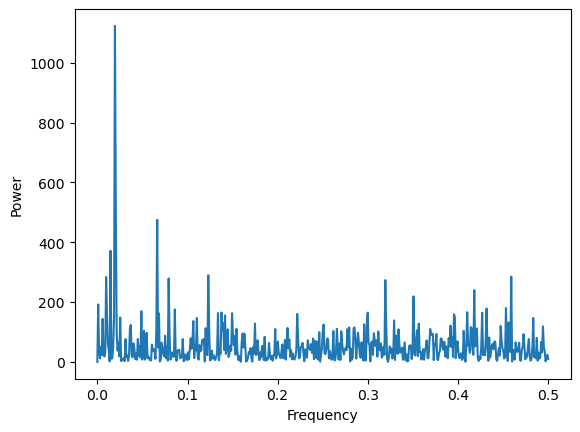

In [23]:
np.random.seed(0)
nx = int(x.shape[0])
n = 5*np.random.randn(nx)
xns = x + n
f,Pxx = signal.periodogram(xns,fs=1,nfft=1024)
plt.figure()
plt.plot(f,Pxx)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

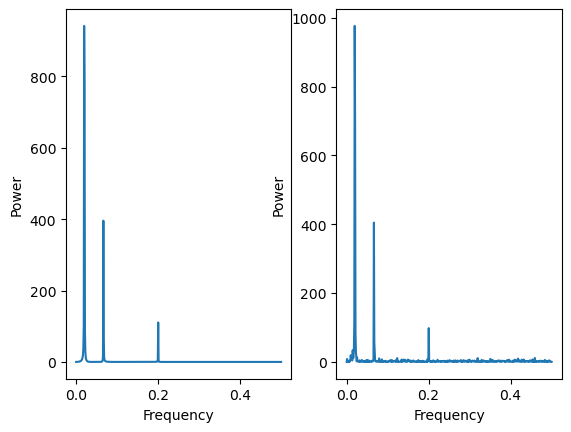

In [26]:
f,Pxx = signal.periodogram(x,fs=1,nfft=1024)
f,Pxxns = signal.periodogram(xns,fs=1,nfft=1024)
plt.figure()
plt.subplot(1,2,1)
plt.plot(f,Pxx)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.subplot(1,2,2)
plt.plot(f,Pxxns)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

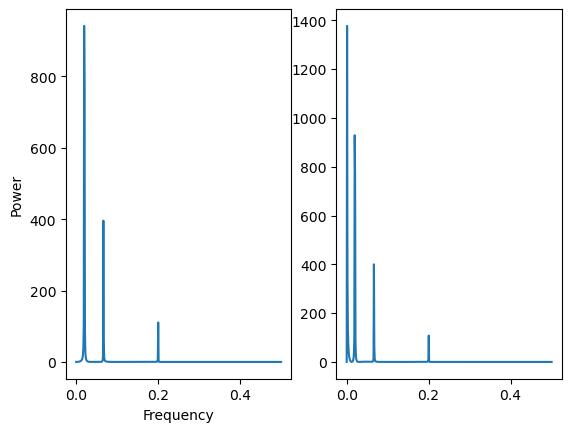

In [20]:
f,Pxx = signal.periodogram(x,fs=1,nfft=1024)
f,Pxxt = signal.periodogram(xt,fs=1,nfft=1024)
plt.figure()
plt.subplot(1,2,1)
plt.plot(f,Pxx)
plt.grid
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.subplot(1,2,2)
plt.plot(f,Pxxt)
plt.grid

In [4]:
%load_ext watermark

In [5]:
%watermark -v -m -p numpy,scipy,matplotlib,xarray,watermark

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.27.0

numpy     : 1.26.4
scipy     : 1.13.1
matplotlib: 3.9.2
xarray    : 2023.6.0
watermark : 2.5.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

